In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [358]:
us_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_US.csv')
other_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_ClimateWatch.csv')
land_usage_df = pd.read_csv('CE-Project-Data/Agricultural_Land_Usage.csv')
pd.set_option('display.max_columns', None)

food_security = pd.read_csv('CE-Project-Data/Suite-of-food-security-indicators_gha.csv')
food_security

,Iso3,StartDate,EndDate,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,#country+code,#date+start,#date+end,NaN,#country+name,#indicator+code,#indicator+name,NaN,NaN,NaN,#date+year,#indicator+type,#indicator+value+num,NaN,NaN
1,GHA,2000-01-01,2002-12-31,81.0,Ghana,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20002002.0,2002,%,114,F,NaN
2,GHA,2001-01-01,2003-12-31,81.0,Ghana,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20012003.0,2003,%,116,F,NaN
3,GHA,2002-01-01,2004-12-31,81.0,Ghana,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20022004.0,2004,%,118,F,NaN
4,GHA,2003-01-01,2005-12-31,81.0,Ghana,21010,Average dietary energy supply adequacy (percen...,6121.0,Value,20032005.0,2005,%,119,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,GHA,2012-01-01,2014-12-31,81.0,Ghana,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20122014.0,2014,g/capita/day,44.6,F,NaN
587,GHA,2013-01-01,2015-12-31,81.0,Ghana,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20132015.0,2015,g/capita/day,42,F,NaN
588,GHA,2014-01-01,2016-12-31,81.0,Ghana,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20142016.0,2016,g/capita/day,40,F,NaN
589,GHA,2015-01-01,2017-12-31,81.0,Ghana,21061,Average fat supply (g/cap/day) (3-year average),6123.0,Value,20152017.0,2017,g/capita/day,39.3,F,NaN


In [349]:
#separate US data by state, sector, and gas type. sum the total gas emissions for each year
#US data frames to use: us_df_state, us_df_sector, us_df_gas, us_df_sum
us_df_state = us_df.groupby(['State']).sum()
us_df_state = us_df_state.style.format('{:.3f}')
us_df_sector = us_df.groupby(['Sector']).sum()
us_df_sector = us_df_sector.style.format('{:.3f}')
us_df_gas = us_df.groupby(['Gas']).sum()
us_df_sum = pd.DataFrame(us_df_gas.sum(axis=0)).T.rename(index={0:'US Total'}).style.format('{:.3f}')
us_df_gas = us_df_gas.style.format('{:.3f}')



#"all ghg" row needs to be filtered first for usa total

us_ghg=us_df[us_df['Gas']=='All GHG']

#filter agriculture sector for usa
us_ghg2=us_ghg[us_ghg['Sector'].str.contains('Agriculture')]

#total GHG emissions for Agriculture
us_ghg_total= us_ghg2[us_ghg2['State']=="USA"]

us_ghg_total

,State,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2024,USA,US,Agriculture,All GHG,551.412016,544.102952,545.504036,572.541345,563.375531,573.315016,581.814439,573.238457,579.017261,573.601131,558.69513,581.076014,580.412335,581.676291,590.224708,579.82261,577.967836,596.463016,592.240072,592.896634,599.352844,582.248074,562.903305,606.359259,614.609853,618.503253,608.028331,608.20366,620.671987


In [350]:
ghana_df = other_df[other_df['Country']=='GHA']


In [351]:
#separate Ghana data by sector and gas type. Sum the total gas emissions for each year
#Ghana data frames to use: ghana_df_sector, ghana_df_gas, ghana_df_sum
ghana_df_sector = ghana_df.groupby(['Sector']).sum()
#ghana_df_sector = ghana_df_sector.style.format('{:.3f}')
ghana_df_gas = ghana_df.groupby(['Gas']).sum()
ghana_df_sum = pd.DataFrame(ghana_df_gas.sum(axis=0)).T.rename(index={0:'Ghana Total'}).style.format('{:.3f}')
ghana_df_gas = ghana_df_gas.style.format('{:.3f}')


#Filter Ghanas agriculture sector and all ghg emissions
gh_ghg=ghana_df[ghana_df['Sector'].str.contains('Agriculture')]

gh_ghg_total=gh_ghg[gh_ghg['Gas']=='All GHG']

gh_ghg_total

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3641,GHA,Climate Watch,Agriculture,All GHG,6.750394,6.97973,6.872989,6.909441,6.936529,6.981573,7.429977,7.563491,8.672055,7.49286,8.717721,7.539638,7.413805,8.082969,7.212575,9.046131,8.644847,8.166854,8.260156,7.96023,8.40762,9.282713,8.814759,9.536574,9.360477,9.837925,9.951817,10.41381,10.13956,10.23535


Text(0.5, 1.0, 'Total Greenhouse Emissions from Agriculture')

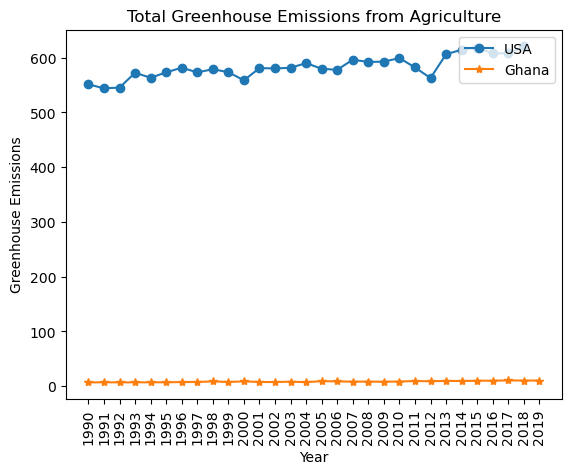

In [352]:
#compare ghanas and usa's all agriculture ghg emissions with a line graph 

usaghg= us_ghg_total.T
head_us=usaghg.iloc[1]
usaghg=usaghg[4:]
usaghg.columns=head_us
usaghg


ghghg= gh_ghg_total.T
head_gh=ghghg.iloc[1]
ghghg=ghghg[4:]
ghghg.columns=head_gh

ghghg

plt.plot(usaghg, label='USA', marker='o')
plt.plot(ghghg, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Greenhouse Emissions")
plt.title("Total Greenhouse Emissions from Agriculture")


In [32]:
#clean land usage data by getting rid of unnecessary columns
land_usage_df = land_usage_df.drop(land_usage_df.columns[3:34], axis=1)
land_usage_df = land_usage_df.drop(columns=['Country Code','2020','2021','Unnamed: 66'])
land_usage_df.head(2)

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Agricultural land (% of land area),11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,Africa Eastern and Southern,Agricultural land (% of land area),44.077433,44.175529,44.364624,43.405047,43.602308,43.786737,43.940969,44.096712,44.238249,44.453834,44.613694,44.754313,44.892132,45.218702,44.973395,45.150072,45.347753,45.511698,45.676483,45.943486,46.156943,46.361515,43.388794,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846


In [33]:
#separate out Ghana and USA land usage data
#Land Usage DataFrames to use: land_usage_gha_df, land_usage_usa_df
land_usage_gha_df = land_usage_df[land_usage_df['Country Name']=='Ghana']
land_usage_usa_df = land_usage_df[land_usage_df['Country Name']=='United States']
land_usage_gha_df

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83,Ghana,Agricultural land (% of land area),55.396853,55.902259,55.902259,56.253845,56.693329,57.572295,58.451261,59.892766,58.392634,58.190318,57.548519,57.447297,57.297732,56.783396,56.000976,56.383185,55.886429,55.829155,55.332399,55.714608,56.008922,55.608544,55.735545,55.774651,55.813756,55.852861,55.653336,55.45381,55.406258,55.391316


Text(0.5, 1.0, '')

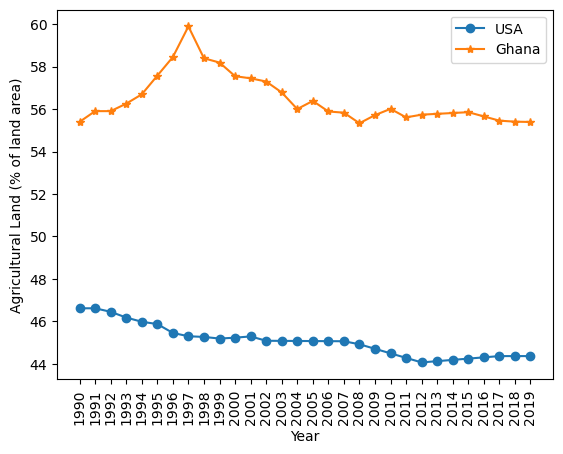

In [345]:
#create a line graph visualizing land use 

usaland_transposed= land_usage_usa_df.T
head=usaland_transposed.iloc[1]
usaland_transposed=usaland_transposed[2:]
usaland_transposed.columns=head

usaland_transposed

ghland_transposed=land_usage_gha_df.T
head2=ghland_transposed.iloc[1]
ghland_transposed=ghland_transposed[2:]
ghland_transposed.columns=head

plt.plot(usaland_transposed, label='USA', marker='o')
plt.plot(ghland_transposed, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Agricultural Land (% of land area)")
plt.title("")

